<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2023/2</h1>
<h2 style="text-align:center;">Lista 1</h2>
<h2 style="text-align:center;">Aluno: Thiago Moutinho</h2>
<h2 style="text-align:center;">Entrega: 04 de setembro de 2023

In [107]:
@time using Clp
@time using JuMP
@time using PyPlot
@time using LinearAlgebra

  0.000126 seconds (140 allocations: 13.102 KiB)
  0.000113 seconds (140 allocations: 13.102 KiB)
  0.000110 seconds (140 allocations: 13.102 KiB)
  0.000151 seconds (217 allocations: 23.727 KiB)


In [108]:
versioninfo()

Julia Version 1.9.2
Commit e4ee485e909 (2023-07-05 09:39 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, icelake-client)
  Threads: 2 on 8 virtual cores


## Problema 1: 

Considere o problema de otimização abaixo:

\begin{align}
& \text{maximize}_{u,v,w} \quad -u + v - w \\
& \text{sujeito a} \quad -5u + 5v + 3w \leq 10 \\
& \qquad 5u - 5v - 3w \leq 10 \\
& \qquad -2u + 2v - w \leq -1 \\
& \qquad \qquad w \leq 3 \\
& \qquad u,v,w \geq 0
\end{align}
 - Resolva o programa linear (PL), utilizando JuMP/Julia.
 - Transforme o PL abaixo à forma padrão $\max {c}^\top {x}$, sujeito a ${Ax}\leq {b}, {x}\geq 0$. Resolva de novo em JuMP, utilizando a forma padrão matricial. Compare as duas soluções obtidas.

### Solução do problem 1:

Primeiro item:

In [109]:
m = Model(Clp.Optimizer)
@variable(m, u >=0)
@variable(m, w >=0)
@variable(m, v >=0)
@constraint(m, w<=3)
@constraint(m, -5u +5v +3w <=10)
@constraint(m, +5u -5v -3w <=10)
@constraint(m, -2u +2v -w <=-1)
@objective(m, Max,-u +v -w)
print(m)
optimize!(m)

println("u = ", JuMP.value.(u) )
println("v = ", JuMP.value.(v) )
println("w = ", JuMP.value.(w) )
println("objective = ", JuMP.objective_value(m) )




u = 1.00000000005e10
v = 1.0e10
w = 0.0
objective = -0.5
Coin0506I Presolve 3 (-1) rows, 3 (0) columns and 9 (-1) elements
Clp0006I 0  Obj -0 Primal inf 0.499999 (1) Dual inf 0.999999 (1)
Clp0006I 1  Obj -0.5
Clp0000I Optimal - objective value -0.5
Coin0511I After Postsolve, objective -0.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.5 - 1 iterations time 0.002, Presolve 0.00


Segundo Item:

In [110]:
#x = [u; v; w]
c = [-1; 1; -1]
A = [0 0 1; -5 3 5; 5 -3 -5; -2 -1 2]
b = [3; 10; 10; -1]


m = Model(Clp.Optimizer)
@variable(m, x[1:3] >=0)
@constraint(m, A*x .<= b)
@objective(m, Max, dot(c,x))

print(m)
optimize!(m)

println("x = ", JuMP.value.(x) )
println("objective = ", JuMP.objective_value(m))

x = [1.0, 1.6666666666666665, 0.0]
objective = 0.6666666666666665
Coin0506I Presolve 3 (-1) rows, 3 (0) columns and 9 (-1) elements
Clp0006I 0  Obj -0 Primal inf 2.499998 (2) Dual inf 1.6666657 (1)
Clp0006I 1  Obj 6.6666667e+09
Clp0006I 1  Obj 3.3333333e+10
Clp0002I Dual infeasible - objective value 3.3333333e+10
Coin0505I Presolved problem not optimal, resolve after postsolve
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0.1999999 (1), primal 0.9999999 (1)
Clp0006I 0  Obj 0 Primal inf 0.4999999 (1) Dual inf 1.8433331 (2)
Clp0029I End of values pass after 1 iterations
Clp0006I 1  Obj 0
Clp0000I Optimal - objective value 0
Clp0006I 0  Obj -0.5 Dual inf 2.4999999 (1)
Clp0006I 2  Obj 3.3333333 Dual inf 0.66666657 (1)
Clp0006I 2  Obj 3.3333333 Dual inf 0.66666657 (1)
Clp0002I Dual infeasible - objective value 3.3333333
Clp0032I DualInfeasible objective 3.333333333 - 3 iterations time 0.002, Presolve 0.00


## Problema 2: 

Considere o LP
\begin{align}
& \text{minimize}\quad c_1 x_1 + c_2 x_2 + c_3 x_3 \\
& \text{sujeito a}\quad x_1 + x_2 \geq 1 \\
& \qquad x_1 + 2x_2 \leq 3 \\
& \qquad x_1,x_2,x_3 \geq 0
\end{align}
Dê o valor ótimo e o conjunto ótimo para os seguintes valores de $c$: $c=(-1,0,1),c=(0,1,0),c=(0,0,-1)$.

### Solução do problema 2:

Para c = (-1,0,1):

In [111]:
c = [-1;0;1]
A = [1 1 0; 1 2 0]
B = [1;3]

m = Model(Clp.Optimizer)
@variable(m, x[1:3] >=0)
@constraint(m, A*x .>= B)
@objective(m, Min, dot(c,x))

print(m)
optimize!(m)

println("x = ", JuMP.value.(x) )
println("objective = ", JuMP.objective_value(m))

x = [1.0e10, 0.0, 0.0]
objective = -1.0e10
Coin0508I Presolve thinks problem is unbounded
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 3.9999998 (2) Dual inf 0.9999999 (1)
Clp0002I Dual infeasible - objective value -1e+10
Clp0032I DualInfeasible objective -1e+10 - 0 iterations time 0.002


Para c = (0, 1, 0)

In [112]:
c = [0;1;0]
A = [1 1 0; 1 2 0]
B = [1;3]

m = Model(Clp.Optimizer)
@variable(m, x[1:3] >=0)
@constraint(m, A*x .>= B)
@objective(m, Min, dot(c,x))

print(m)
optimize!(m)

println("x = ", JuMP.value.(x) )
println("objective = ", JuMP.objective_value(m))

x = [3.0, 0.0, 0.0]
objective = 0.0
Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-4) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00


## Problema 3 (Revisão de álgebra linear):

Escreva as afirmações abaixo na linguagem de matrizes. Exemplo: A afirmação "Toda coluna de $C$ é uma combinação linear das colunas de $B$ pode ser escrita em linguagem matricial como $C = BF$ para alguma matriz $F$. Observações: (i) Você pode supor que todas as matrizes que você utiliza têm as dimensões apropriadas; (ii) pode existir mais de uma resposta correta, basta dar qualquer uma!
- (a) Para cada $i$, linha $i$ de $Z$ é uma combinação linear das linhas $i, \ldots , n$ de $Y$.
- (b) $W$ é obtida a partir da matriz $V$ permutando colunas pares e ímpares adjacentes (i.e., $1$ e $2$, $3$ e $4$, ...)
- (c) Cada coluna de $P$ faz um ângulo agudo com cada coluna de $Q$.
- (d) Cada coluna de $P$ faz um ângulo agudo com cada coluna correspondente de $Q$.
- (e) As primeiras $k$ colunas de $A$ são ortogonais às demais colunas de $A$.

### Solução do problema 3:

a:

In [113]:
W = [5 7 2; 1 12 19; 2 3 7]
Y = [15 6 1; 10 12 3; 2 5 8]

Z = Y * W

println("Z = ", Z)

Z = [83 180 151; 68 223 269; 31 98 155]


b:

In [114]:
V = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]
permutação = [0 1 0 0; 1 0 0 0; 0 0 0 1; 0 0 1 0]

W = V * permutação

println("W = ", W)

W = [2 1 4 3; 6 5 8 7; 10 9 12 11; 14 13 16 15]


c:

In [115]:
#Se o produto escalar entre as colunas de P e Q for positivo é garantido que o angulo é agudo

P = [1 2; 2 3; 3 4]  
Q = [5 6; 7 8; 9 10]

produto_escalar = transpose(P) * Q

println(produto_escalar)


[46 52; 67 76]


D:

In [116]:

P = [1 2; 2 3; 3 4] 
Q = [5 6; 7 8; 9 10] 


produto_escalar_correspondente = sum(P .* Q, dims=1)

println(produto_escalar_correspondente)

[46 76]


E:

In [117]:
#Para ser ortogonal o produto escalar é = 0

A = [1 -2 3; 0 0 1; 1 -2 -3]
k = 2 # pode ser outro valor
primeiras_k_colunas = A[:, 1:k]
colunas_restantes = A[:, k+1]

println(transpose(primeiras_k_colunas))
println(colunas_restantes)

produto_escalar_ortogonalidade = transpose(primeiras_k_colunas) * colunas_restantes

println(produto_escalar_ortogonalidade)

if all(produto_escalar_ortogonalidade .== 0)
    println("As primeiras $k colunas de A são ortogonais às demais colunas de A.")
else
    println("As primeiras $k colunas de A não são ortogonais às demais colunas de A.")
end

[1 0 1; -2 0 -2]
[3, 1, -3]
[0, 0]
As primeiras 2 colunas de A são ortogonais às demais colunas de A.


## Problema 4 (Hiperplanos e semi-espaços):

- (a) Deriva uma fórmula para a distância entre dois hiperplanos paralelos $\{x \in {\mathbb R}^n : a^T x = b_1\}$ e $\{x \in {\mathbb R}^n : a^T x = b_2\}$?
- (b) Dê condições para que o semi-espaço $H_1 = \{x \in {\mathbb R}^n : a_1^T x = b_1\}$ esteja contido em $H_2 = \{x \in {\mathbb R}^n : a_2^T x = b_2\}$, justificando sua resposta.

### Solução do problema 4:


a:

In [118]:
#a formula para a distancia desses 2 hiperplanos é |b2-b1| / ||a||

a = [9; 7; 3]
b1 = 3
b2 = 6

norma_a = norm(a)

println(norma_a)

distancia = abs(b1 - b2) / norma_a

println("A distância entre os hiperplanos é: ", distancia)

11.789826122551595
A distância entre os hiperplanos é: 0.2544566789039913


b:

In [119]:
#para que esteja contido a1 e a2 devem apontar na mesma direção, logo o produto escalar é positivo ( angulo agudo)

a1 = [3, 4, 5]
a2 = [1, 5, 6]

b1 = 3
b2 = 9

produto_escalar = transpose(a1) * a2
println(produto_escalar)


53


## Problema 5 (Poliédros): 

Quais dos conjuntos $S$ definidos abaixo são poliédros? Se possível, escreva $S$ na forma $S = \{x : Ax \leq b, Cx = d\}$.
- (a) $S = \{y_1 a_1 + y_2 a_2 : -1 \leq y_1 \leq 1, -1 \leq y_2 \leq 1 \}$, sendo $a_1, a_2$ vetores linearmente independentes em ${\mathbb R}^n$.
- (b) $S = \{x \in {\mathbb R}^n : x \geq 0, {\mathbb 1}^T x = 1, \sum_{i=1}^n x_i a_i = b_1, \sum_{i=1}^n x_i a_i^2 = b_2\}$, sendo $a_1, \ldots , a_n \in {\mathbb R}$ e $b_1,b_2 \in {\mathbb R}$.
- (c) $S = \{x \in {\mathbb R}^n : x \geq 0,x^T y \leq 1,~\text{para todo}~y~\text{tal que}~\|y\|_2 = 1 \}$.
- (d) $S = \{x \in {\mathbb R}^n : x \geq 0,x^T y \leq 1,~\text{para todo}~y~\text{tal que}~\|y\|_1 = 1 \}$.

### Solução do problem 5:




a) $S$ é uma combinação linear de $y_1$ e $y_2$, logo não é um poliedro e não pode ser representado nessa forma

b) $S$ é um poliedro e pode ser representado na forma $S = \left\{x \in \mathbb{R}^n : \begin{bmatrix} -I \\ \mathbb{1}^T \\ a_1^T \\ a_2^T \end{bmatrix} x \leq \begin{bmatrix} \mathbf{0} \\ 1 \\ b_1 \\ b_2 \end{bmatrix}, \mathbf{0}^T x = 0\right\}$

c) Esse conjunto não pode ser representado nesse formato, e portanto não é um poliedro

d) Esse conjunto também não pode ser representado no formato de desigualdades lineares, portanto não é um poliedro

## Problema 6 (Centro de Chebyshev)
Encontre o centro e o raio do maior círculo que possa ser inscrito no poliédro descrito pelas inequações $Ax \leq b$, sendo $x \in {\mathbb R}^2$, $A = \begin{bmatrix} -0.26 & 0.97\\0.42 & -0.91\\0.91 & 0.42\\-0.82 & - 0.57\end{bmatrix}$ e $b = \begin{bmatrix} 5.0\\1.0\\8.0\\-1.5\end{bmatrix}$. O que acontece (à solução encontrada pelo JuMP) se acresecentar a inequação $[1 \quad 0] \leq -3$ às quatro inequações já especificadas (i.e., $Ax\leq b$)? Explique sua resposta.

### Solução do problem 6:

In [120]:
A = [-0.26 0.97; 0.42 -0.91; 0.91 -0.42; -0.82 -0.57]
b = [5.0; 1.0; 8.0; -1.5]

m = Model(Clp.Optimizer)
@variable(m, r >= 0)           
@variable(m, x[1:2]) 
for i = 1:size(A,1)
    @constraint(m, dot(A[i,:],x) + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)

optimize!(m)

xc,yc = JuMP.value.(x)
r = JuMP.objective_value(m)
println("As coordenadas são: ",[xc,yc])
println("O maior raio é: ", r)

As coordenadas são: [2.876264474644579, 3.165183244953473]
O maior raio é: 2.666293247661685
Coin0506I Presolve 0 (-4) rows, 0 (-3) columns and 0 (-12) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 2.6662932
Coin0511I After Postsolve, objective 2.6662932, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2.666293248 - 0 iterations time 0.002, Presolve 0.00


Adicionando a inequação $[1 \quad 0] \leq -3$

In [121]:
A = [-0.26 0.97; 0.42 -0.91; 0.91 -0.42; -0.82 -0.57; 1.0 0]
b = [5.0; 1.0; 8.0; -1.5; -3]

m = Model(Clp.Optimizer)
@variable(m, r >= 0)           
@variable(m, x[1:2]) 
for i = 1:size(A,1)
    @constraint(m, dot(A[i,:],x) + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)

optimize!(m)

xc,yc = JuMP.value.(x)
r = JuMP.objective_value(m)
println("As coordenadas são: ",[xc,yc])
println("O maior raio é: ", r)

Coin0507I Presolve determined that the problem was infeasible with tolerance of 1e-08
Clp3003W Analysis indicates model infeasible or unbounded
Clp0006I 0  Obj 0 Primal inf 4.5020289 (2) Dual inf 0.9999999 (1)
Clp0006I 3  Obj -0.57785486 Primal inf 0.57785476 (1)
Clp0001I Primal infeasible - objective value -0.57785486
Clp0032I PrimalInfeasible objective -0.5778548563 - 3 iterations time 0.002


LoadError: Primal solution not available

Deu esse erro

## Problema 7 (Geometria de LP)

- (a) Determine se $\bar{x} = (1,1,1,1)$ é vértice do poliédro $P$ definido pelas desigualdades lineares:
$$
\begin{bmatrix} -1 & -6 & 1 & 3\\-1 & -2 & 7 & 1\\0 & 3 & -10 & -1\\-6 & -11 & -2 & 12\\1 & 6 & -1 & -3\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \leq \begin{bmatrix} -3 \\ 5 \\ -8 \\ -7 \\ 4 \end{bmatrix}
$$
- Se sim, determine um vetor $c$ tal que $\bar{x}$ seja o minmizador único de $c^T x$ sobre $P$.
- (b) mesma pergunta para o poliédro definido pelas desigualdades
$$
\begin{bmatrix} 0 & -5 & -2 & -5\\-7 & -7 & -2 & -2\\-4 & -4 & -7 & -7\\-8 & -3 & -3 & -4\\-4 & -4 & 2 & -2\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \leq \begin{bmatrix} -12 \\ -17 \\ -22 \\ -18 \\ -8 \end{bmatrix}
$$
e, adicionalmente, a igualdade $8x_1 - 7x_2 - 10x_3 -11x_4 = -20$.

### Solução do problem 7:

a:

In [ ]:
#x = [1; 1; 1; 1]
# para ser vertice Ax = B

A = [-1 -6 1 3; -1 -2 7 1; 0 3 -10 -1; -6 -11 -2 12; 1 6 -1 -3]
x = [1; 1; 1; 1]
b = [-3; 5; -8; -7; 4]

println(A * c)




[-3, 5, -8, -7, 3]


Ja que Ax é diferente de B, x = (1 1 1 1) não é vértice

b:

In [ ]:
A = [0 -5 -2 -5; -7 -7 -2 -2; -4 -4 -7 -7; -8 -3 -3 -4; -4 -4 2 -2]
x = [1; 1; 1; 1]
b = [-12; -17; -22; -18; -8]

println(A * c)

[-12, -18, -22, -18, -8]


Também nao é vértice

## Problema 8 (Grid elétrico com armazenamento de energia)

A cidade Varre-Sai compra sua energia elétrica da utilidade Ampla que cobre por hora. Se for utilizado menos de 50MWh durante uma determinada hora do dia,  o custo é 100 reais por MWh. Qualquer excedente (além de 50 MWh) durante esta hora custa 400 reais por MWh. A energia máxima que Ampla pode fornecer (em qualquer intervalo de uma hora) é 75 MWh. As tabelas abaixo mostram a demanda diária média hora a hora para a cidade Varre-Sai durante o mes de janeiro.

| Hora do dia (manhã) | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10| 11| 12|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 43| 40| 36| 36| 35| 38| 41| 46| 49| 48| 47| 47|

| Hora do dia ( tarde )| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 48| 46| 45| 47| 50| 63| 75| 75| 72| 66| 57| 50|

O prefeito de Varre-Sai está preocupado com o gasto alto na parte da tarde e o risco de blecautes por volta de 19h por conta da demanda média alta (perigosamente) próxima ao limite de 75 MWh estipulado pela Ampla.

Para contornar estes problemas potenciais, o prefeito comprou uma bateria grande com capacidade de armazenamento de 30 MWh. A ideia seria comprar mais energia (do que a demanda na primeira parte do dia, quando energia custa menos), armazenar na bateria e utilizar nos horários de pico mais tarde, quando tanto a demanda como o preço atingem valores altos.
1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos  blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.
2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?
3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

### Solução do problem 8:

1:

In [ ]:
demandas = [43, 40, 36, 36, 35, 38, 41, 46, 49, 48, 47, 47, 48, 46, 45, 47, 50, 63, 75, 75, 72, 55, 57, 50]
custos = [100, 400]

custo_total = 0 
limite = 50 

for i in demandas
    if i < limite
        custo_total += custos[1]*i 
    else 
        excedente = i-limite 
        custo_total += custos[1]*limite + custos[2]*excedente
    end
end

println("Custo sem bateria: \$", JuMP.value.(custo_total))

m = Model(Clp.Optimizer)

@variable(m, 0 <= normal[1:24] <= 50)        
@variable(m, 0 <= extra[1:24] <= 25)        
@variable(m, 0 <= gerador[1:25] <= 30)       

@constraint(m, gerador[1] == 0)              
@constraint(m, fluxo[i in 1:24], extra[i]+normal[i]+gerador[i]==demandas[i]+gerador[i+1])     
@constraint(m, energia[i in 1:24], extra[i]+normal[i] <= 65)    

total = [sum(normal) sum(extra)] 

@objective(m, Min, dot(custos,total))         

optimize!(m)

println("Custo com bateria: R\$", JuMP.objective_value.(m))
println("Economia obtida: R\$", JuMP.value.(custo_total) - JuMP.objective_value.(m))


Custo sem bateria: $148000
Custo com bateria: R$139000.0
Economia obtida: R$9000.0
Coin0506I Presolve 47 (-2) rows, 70 (-3) columns and 140 (-5) elements
Clp0006I 0  Obj 8439.9993 Primal inf 1104.6 (23)
Clp0006I 31  Obj 97380 Primal inf 1724.2 (19)
Clp0006I 66  Obj 139000
Clp0000I Optimal - objective value 139000
Coin0511I After Postsolve, objective 139000, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 139000 - 66 iterations time 0.002, Presolve 0.00


2:

In [ ]:
m = Model(Clp.Optimizer)

@variable(m, 0 <= normal[1:24] <= 50)        
@variable(m, 0 <= extra[1:24] <= 25)        
@variable(m, 0 <= gerador[1:25])             

@constraint(m, gerador[1] == 0)              
@constraint(m, fluxo[i in 1:24],  extra[i]+normal[i]+gerador[i]==demandas[i]+gerador[i+1])     
@constraint(m, energia[i in 1:24], extra[i]+normal[i] <= 65)     

total = [sum(normal) sum(extra)]

@objective(m, Min, dot(custos,total))         

optimize!(m)

println("Custo com bateria infinita: R\$", JuMP.objective_value.(m))
println("Economia obtida: R\$", JuMP.value.(custo_total) - JuMP.objective_value.(m))


Custo com bateria infinita: R$118900.0
Economia obtida: R$29100.0
Coin0506I Presolve 46 (-3) rows, 69 (-4) columns and 138 (-7) elements
Clp0006I 0  Obj 1789.9999 Primal inf 1171.1 (22)
Clp0006I 31  Obj 102700 Primal inf 1192.5 (22)
Clp0006I 63  Obj 118900
Clp0000I Optimal - objective value 118900
Coin0511I After Postsolve, objective 118900, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 118900 - 63 iterations time 0.002, Presolve 0.00


## Problema 9 (Construção de um estádio esportivo [sob regime de anti-propina!])
Uma cidade pequena deseja construir um estádio (também pequeno). Após licitação, uma empreiteira ganha o contrato e deseja cumprir a tarefa no menor tempo possível. Todas as grandes tarefas estão listadas na tabela abaixo. Algumas podem ser iniciadas apenas quando as tarefas predecessoras tiverem sido concluídas e esta dependência está registrada na quarta coluna.

|Tarefa | Descrição | Duração (em semanas)| Tarefas predecessoras | Redução máxima (em semanas)| Custo da redução (R\$1k/semana) |
|:---:|:----------:|:------------------:|:------------:|:---------------------------:|:---------------------------:|
|1 |Instalação no local de construção |2 | não há | 0 | -- |
| 2| Terraplenagem | 16 | 1 | 3 | 30 |
|3 |Construção da fundação | 9 | 2 | 1 | 26 |
| 4 |Ruas de acesso e outras redes | 8 | 2 | 2 | 12 |
| 5 | Construir o porão | 10 | 3 | 2 | 17 |
| 6 | Piso principal | 6 | 4,5 | 1 | 15 |
| 7 | Divisão do vestiário | 2 | 4 | 1 | 8 |
| 8 | Instalação elétrica nas arquibancadas | 2 | 6 | 0 | -- |
|9  | Construção da cobertura | 9 | 4,6 | 2 | 42 |
|10 | Iluminação do estádio | 5 | 4 | 1 | 21 |
| 11 | Instalações nas arquibancadas | 3 | 6 | 1 |18 |
| 12 | Impermeabilização da cobertura | 2 | 9 | 0 | -- |
| 13 | Acabamento do vestiário | 1 | 7 | 0 | -- |
| 14 | Construção da bilheteria | 7 | 2 | 2 | 22 |
| 15 | Ruas de acesso secundárias | 4 | 4,14 | 2 | 12 |
|16  | Placar e altofalantes |3 | 8,11,14 | 1 | 6 |
|17 | Gramado e acessórios para esportes | 9 | 12 | 3 | 16 |
|18 | Entrega do estádio | 1 | 17 | 0 | -- |

As perguntas que a empreiteira quer que sejam respondidas são as seguintes:
1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 
2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.
3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

### Solução do problem 9:

1:

In [ ]:
tasks = []
for i = 'a':'r'
    push!(tasks, Symbol(i))    
end

dur = [ 2, 16, 9, 8, 10, 6, 2, 2, 9, 5, 3, 2, 1, 7, 4, 3, 9, 1]
duration = Dict(zip(tasks,dur))

pre = ( [], [:a], [:b], [:b], [:c], [:d, :e], [:d], [:f], [:d,:f], [:d], [:f], [:i], [:g],
    [:b], [:d,:n], [:h,:k,:n], [:l], [:q])
pred = Dict(zip(tasks,pre));

m = Model(Clp.Optimizer)

@variable(m, tstart[tasks])

for i in tasks
    for j in pred[i]
        @constraint(m, tstart[i] >= tstart[j] + duration[j])
    end
end
@constraint(m, tstart[:a] == 0)

@objective(m, Min, tstart[:r] + duration[:r])   

optimize!(m)
println(JuMP.value.(tstart))
println("duracao minima: ",  JuMP.value.(tstart[:r]) + duration[:r], " semanas")

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Any[:a, :b, :c, :d, :e, :f, :g, :h, :i, :j, :k, :l, :m, :n, :o, :p, :q, :r]
And data, a 18-element Vector{Float64}:
  0.0
  2.0
 18.0
 18.0
 27.0
 37.0
 26.0
 43.0
 43.0
 26.0
 43.0
 52.0
 28.0
 18.0
 26.0
 46.0
 54.0
 63.0
duracao minima: 64.0 semanas
Coin0506I Presolve 0 (-23) rows, 0 (-18) columns and 0 (-45) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 64
Coin0511I After Postsolve, objective 64, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 64 - 0 iterations time 0.002, Presolve 0.00


2:

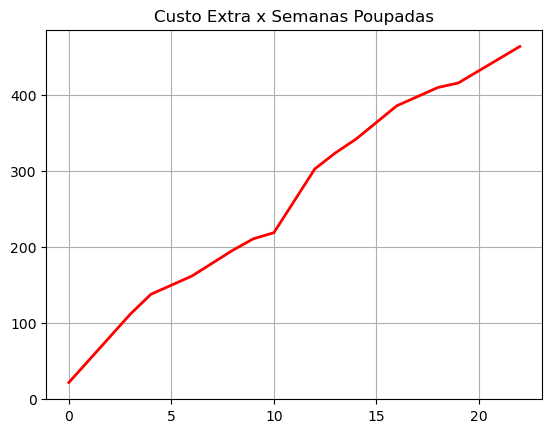

PyObject Text(0.5, 1.0, 'Custo Extra x Semanas Poupadas')

In [ ]:
semanas = [0, 3, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0] 
custo = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]
aux = 0
semanas_total = []
custo_total = []
custo_acumulado = []
j=1

for i in semanas
    push!(semanas_total, i+aux)
    aux = aux + i
    push!(custo_acumulado, custo[j]*semanas[j])
    j = j+1
end

for i in custo_acumulado
    push!(custo_total, i+aux)
    aux = aux + i
end

plot(semanas_total, custo_total, color="red", linewidth=2.0);
grid("on");
title("Custo Extra x Semanas Poupadas")

## Problema 10: (Clássico: dieta ótima)

Suponha que uma certa dieta alimentar esteja baseada nos alimentos (em parêntesis vemos as unidades utilizadas): 
leite desnatado (litro) , carne magra de boi (Kg), carne de frango (kg) e batata doce (100 g). 
Sabendo-se que os requisitos nutricionais serão expressos em termos de vitaminas A,C, e D e controlados por 
suas quantidades mínimas (em miligramas), uma vez que são indispensáveis à preservação da saúde da pessoa 
que estará se submetendo a dieta. A Tabela abaixo resume a quantidade de cada vitamina em disponibilidade 
**em cada unidade considerada dos alimentos**, sua necessidade diária para a boa saúde de uma pessoa e o custo 
(em reais) de cada unidade do alimento considerado. Modele e resolva o problema de forma a minimizar os gastos com a 
compra dos alimentos, obedecendo às quantidades mínimas recomendadas em relação às vitaminas.

Tabela: Dados do problema da dieta

|Alim.$\rightarrow$|leite | carne |frango | batata | Qtd. Mín. |
|------------------|------|-------|-------|--------|-----------|
|Vit.$\downarrow$ |  
|A |2 |2 |5 |4 |11 |
|C |50 | 20 | 10 | 45| 70 |
|D |80 |70 |10 |60 |250|
| |
|Custo $\rightarrow$ |5 |40 |20 |2 |




### Solução do problem 10:

In [ ]:
m = Model(Clp.Optimizer)

A = [2 2 5 4; 50 20 10 45; 80 70 10 60]
b = [11; 70 ;250]
c = [5; 40; 20; 2]

@variable(m, x[1:4] >= 0)

@constraint(m, A*x .>= b ) 

@objective(m, Min, dot(c,x)) 

optimize!(m)

leite, carne, frango, batata = JuMP.value.(x)
println("Custo mínimo.: ", JuMP.value.(dot(c,x)))
println("Leite: ", leite, ". Carne: ", carne, ". Frango: ", frango,". Batata: ", batata)

Custo mínimo.: 8.333333333333332
Leite: 0.0. Carne: 0.0. Frango: 0.0. Batata: 4.166666666666666
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 6.7249997 (3)
Clp0006I 1  Obj 8.3333333
Clp0000I Optimal - objective value 8.3333333
Clp0032I Optimal objective 8.333333333 - 1 iterations time 0.002
